In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from numpy import where
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [ ]:
df=pd.read_csv(r'dataset.csv')

# Preprocessing

In [ ]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:
len(df[df.duplicated()])

0

In [ ]:
df.dropna()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [ ]:
df.rename(columns = {'Nacionality':'Nationality'}, inplace = True)

In [ ]:
df.Target.unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [ ]:
index_enrolled= df[ (df['Target'] == 'Enrolled')].index
df.drop(index_enrolled , inplace=True)

In [ ]:
df['Target'].replace(['Graduate', 'Dropout'],
                        [0,1], inplace=True)

In [ ]:
df=df.round()

In [ ]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.0,0,11.0,1.0,2.0,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,14.0,0,14.0,-0.0,1.0,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.0,0,11.0,1.0,2.0,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.0,0,9.0,-1.0,-3.0,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.0,0,14.0,-0.0,1.0,0


Marital status

In [ ]:
df['Marital status'].unique()

array([1, 2, 4, 3, 5, 6])

In [ ]:
# Replace values 4, 5, and 6 with 3 in the "marital status" column
df["Marital status"] = df["Marital status"].replace([4, 5, 6], 3)

In [ ]:
df['Marital status'].unique()

array([1, 2, 3])

Box plot

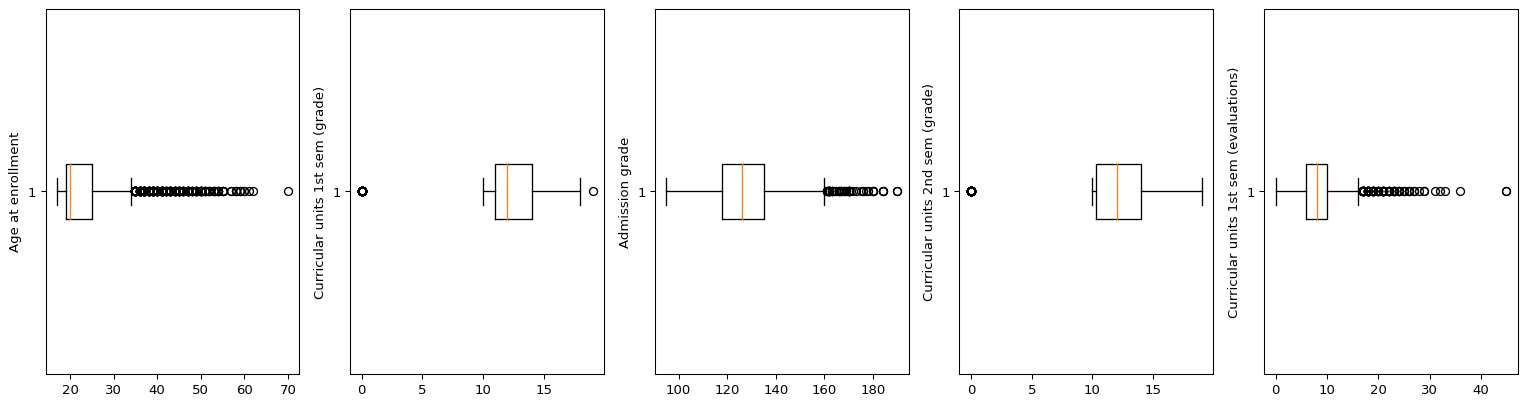

In [ ]:
# Box Plots
cols=['Age at enrollment','Curricular units 1st sem (grade)','Admission grade','Curricular units 2nd sem (grade)','Curricular units 1st sem (evaluations)']

# cols=['Age at enrollment','Admission grade', 'Unemployment rate','Curricular units 2nd sem (grade)','Curricular units 1st sem (grade)','Curricular units 1st sem (evaluations)','Curricular units 1st sem (without evaluations)']
fig, axs = plt.subplots(1,5,dpi=95, figsize=(20,5))
i = 0
for col in cols:
    if i==5: break
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

Remove outliers in numeric columns

In [ ]:
# Identifying the quartiles for age
q1, q3 = np.percentile(df['Age at enrollment'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
clean_data = df[(df['Age at enrollment'] >= lower_bound)
                & (df['Age at enrollment'] <= upper_bound)]

In [ ]:
df=clean_data

In [ ]:
df.shape

(3241, 37)

Histogram

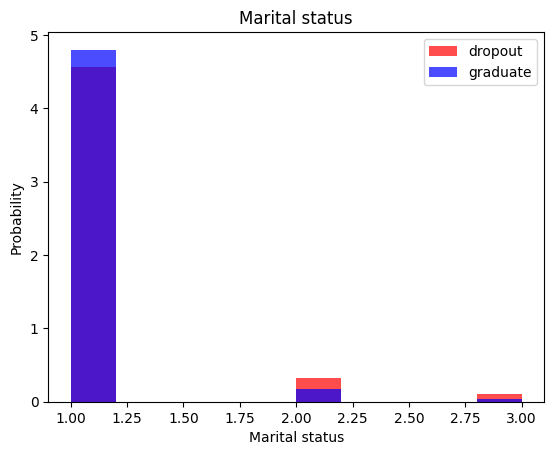

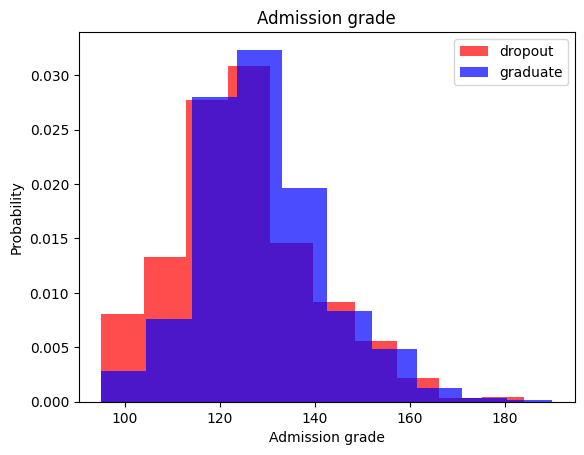

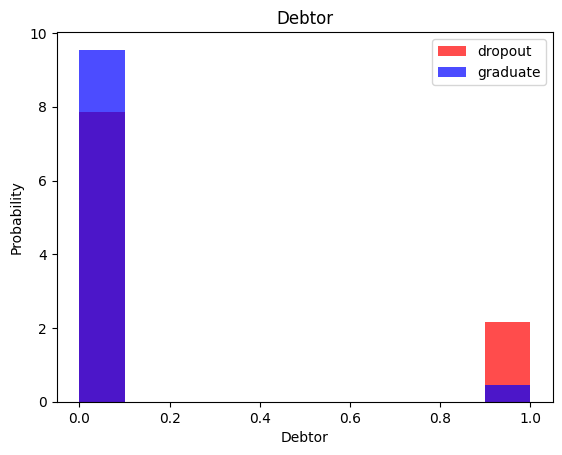

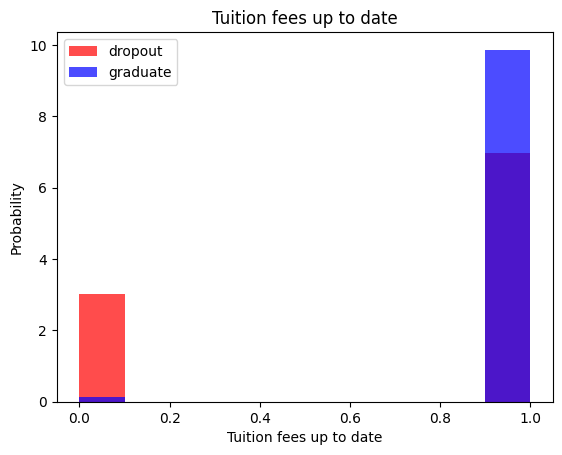

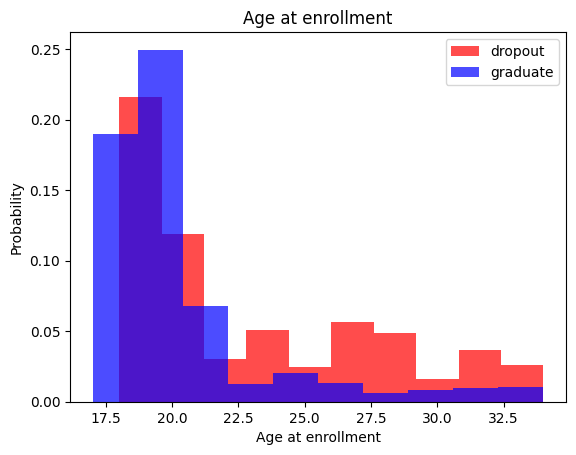

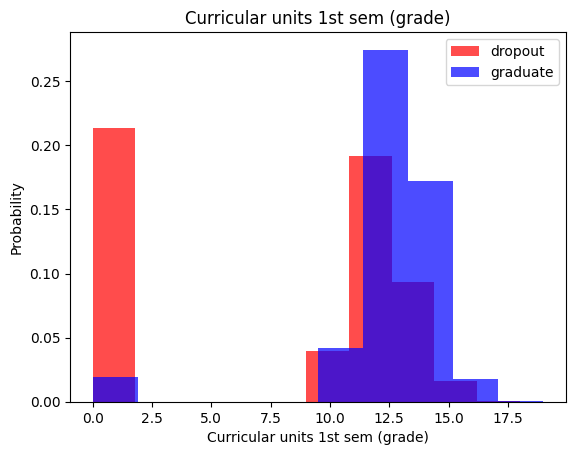

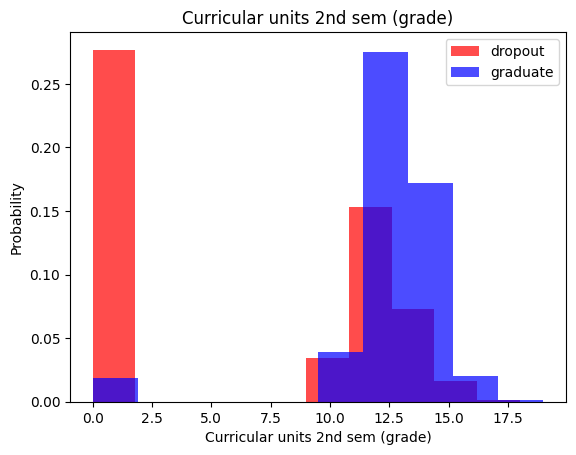

In [ ]:
graduate_plot = {'density':True,'label':'graduate','alpha':0.7,'color':'blue'}
droput_plot = {'density':True,'label':'dropout','alpha':0.7,'color':'red'}

for column in df[:-1]:
    if(column in ['Marital status','Admission grade','Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)','Age at enrollment','Tuition fees up to date','Debtor']):
      plt.hist(df[df['Target'] == 1][column],**droput_plot)
      plt.hist(df[df['Target'] == 0][column],**graduate_plot)
      plt.title(column)
      plt.xlabel(column)
      plt.ylabel('Probability')
      plt.legend()
      plt.show()

Drop irrelevant columns

In [ ]:
df = df.drop(columns=['Application mode', 'Application order', 'International', 'Displaced', 'Nationality', 'Father\'s qualification', 'Mother\'s qualification','Inflation rate', 'GDP'], axis=1)


In [ ]:
df.columns

Index(['Marital status', 'Course', 'Daytime/evening attendance',
       'Previous qualification', 'Previous qualification (grade)',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Target'],
      dtype='object')

Heat map

In [ ]:
df.corr()['Target']

Marital status                                    0.098624
Course                                           -0.047731
Daytime/evening attendance                       -0.085382
Previous qualification                            0.050840
Previous qualification (grade)                   -0.101866
Mother's occupation                              -0.014439
Father's occupation                              -0.015003
Admission grade                                  -0.135495
Educational special needs                         0.010299
Debtor                                            0.264659
Tuition fees up to date                          -0.430036
Gender                                            0.245591
Scholarship holder                               -0.305366
Age at enrollment                                 0.310467
Curricular units 1st sem (credited)              -0.028439
Curricular units 1st sem (enrolled)              -0.159782
Curricular units 1st sem (evaluations)           -0.0492

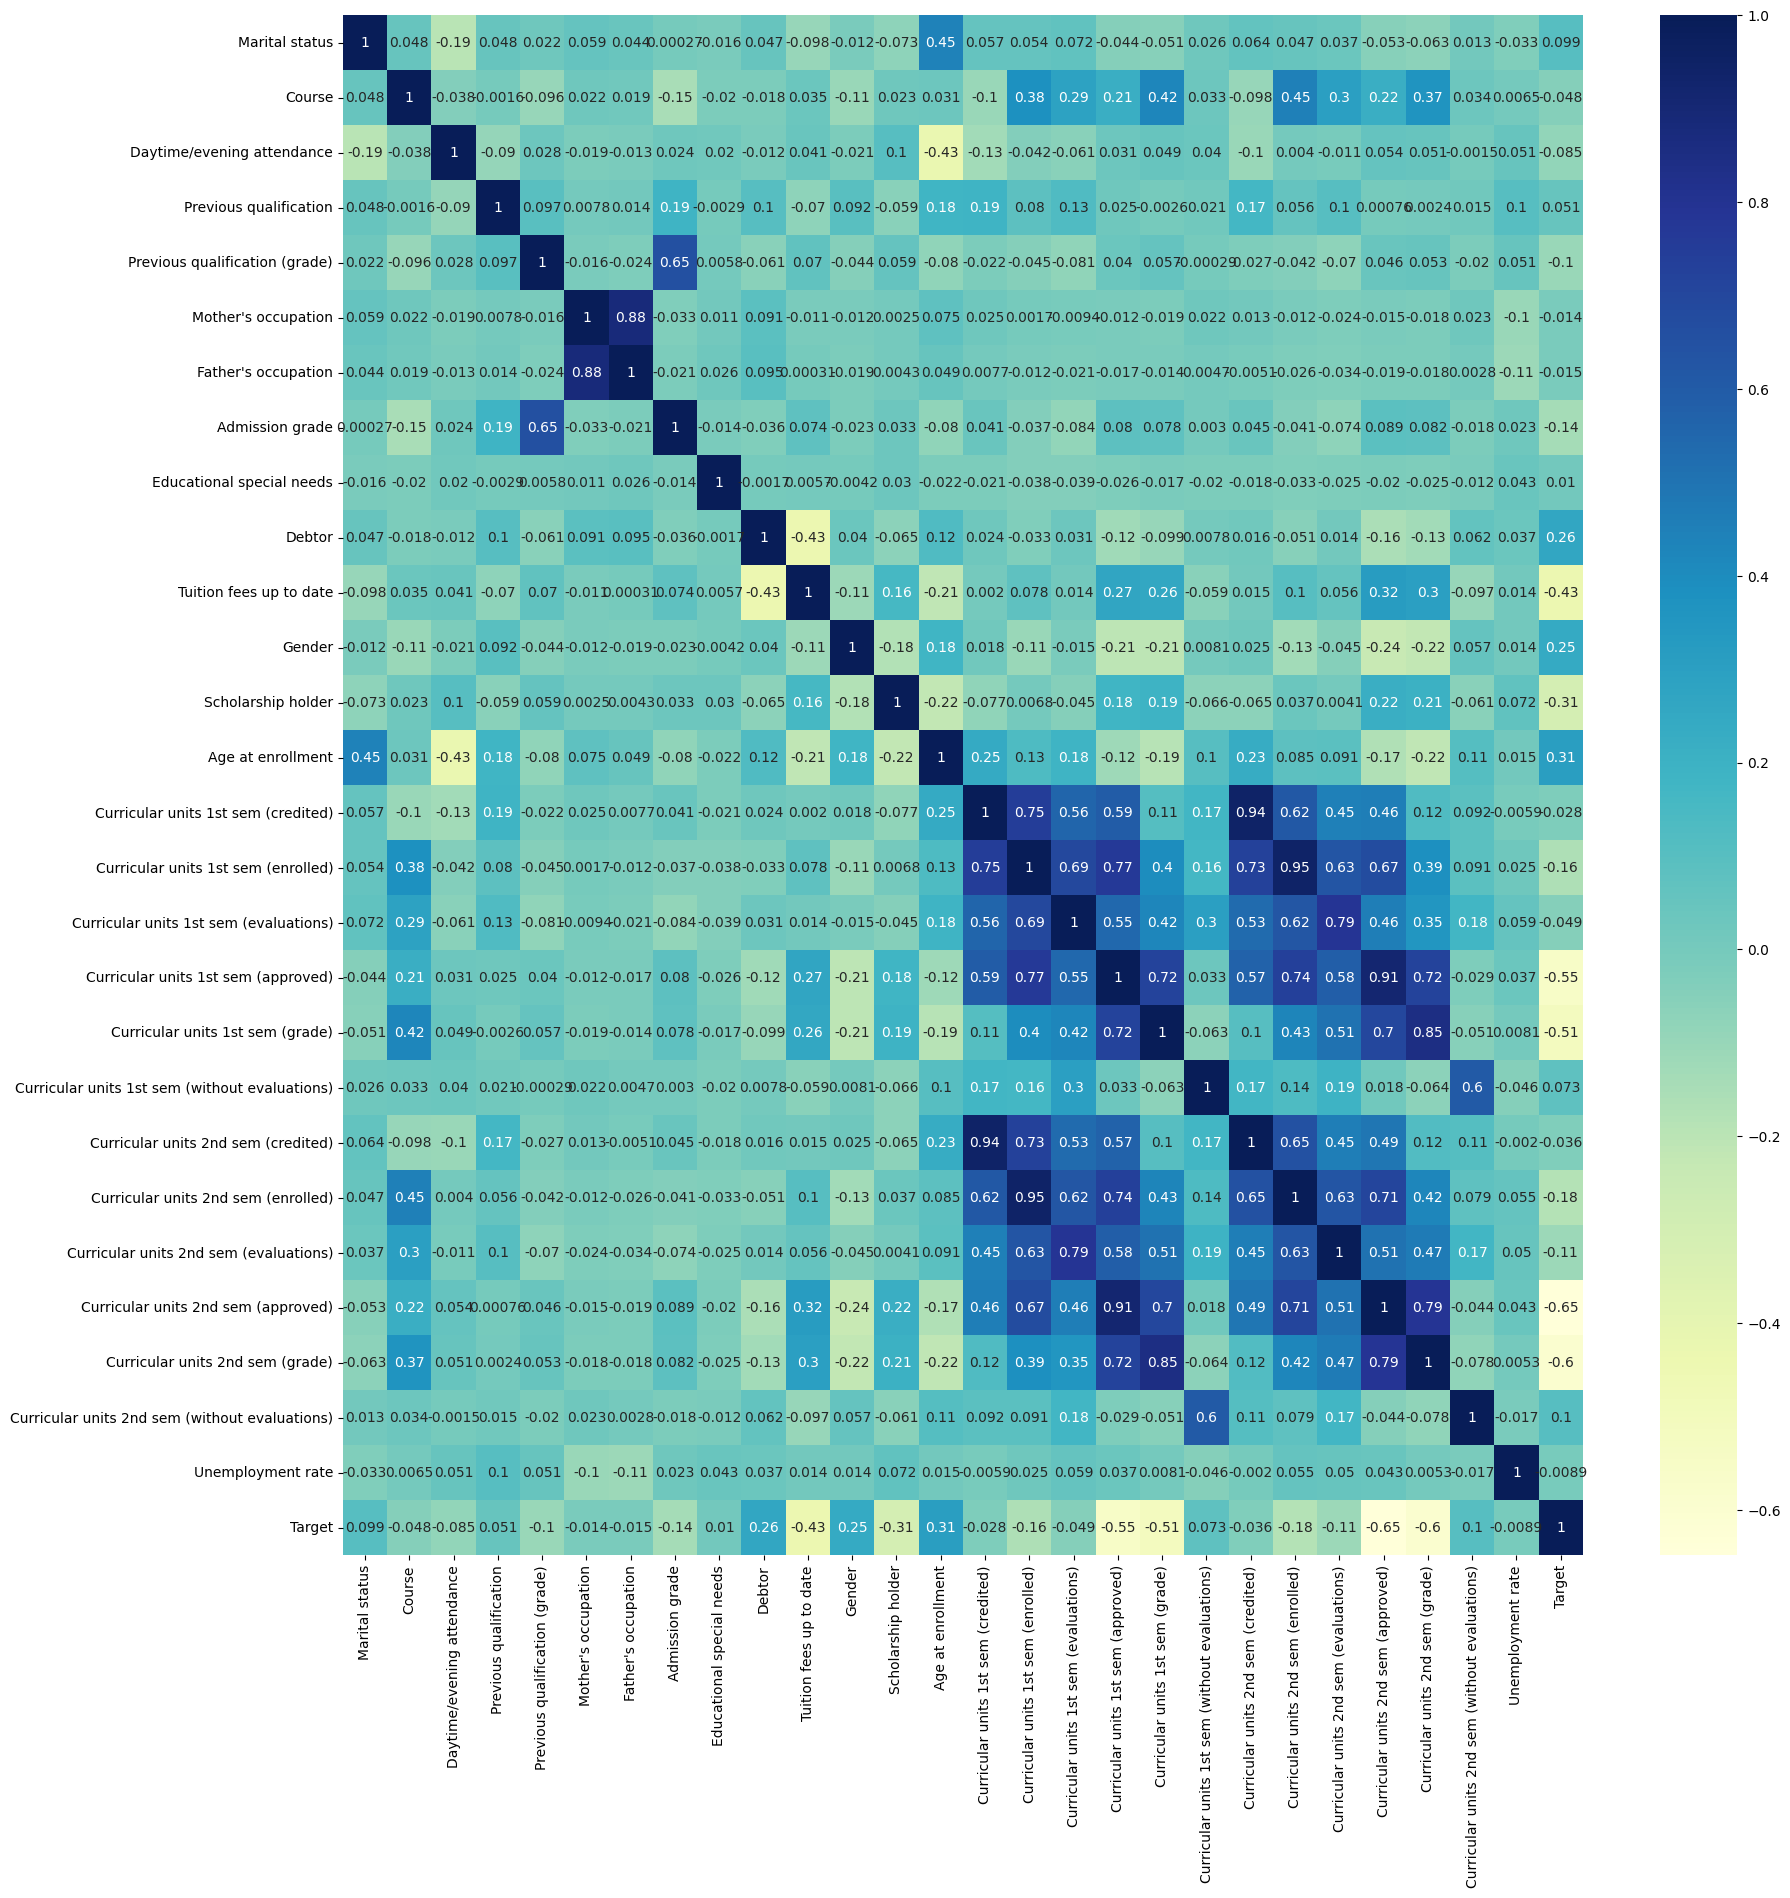

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

Count plot

<Figure size 800x600 with 0 Axes>

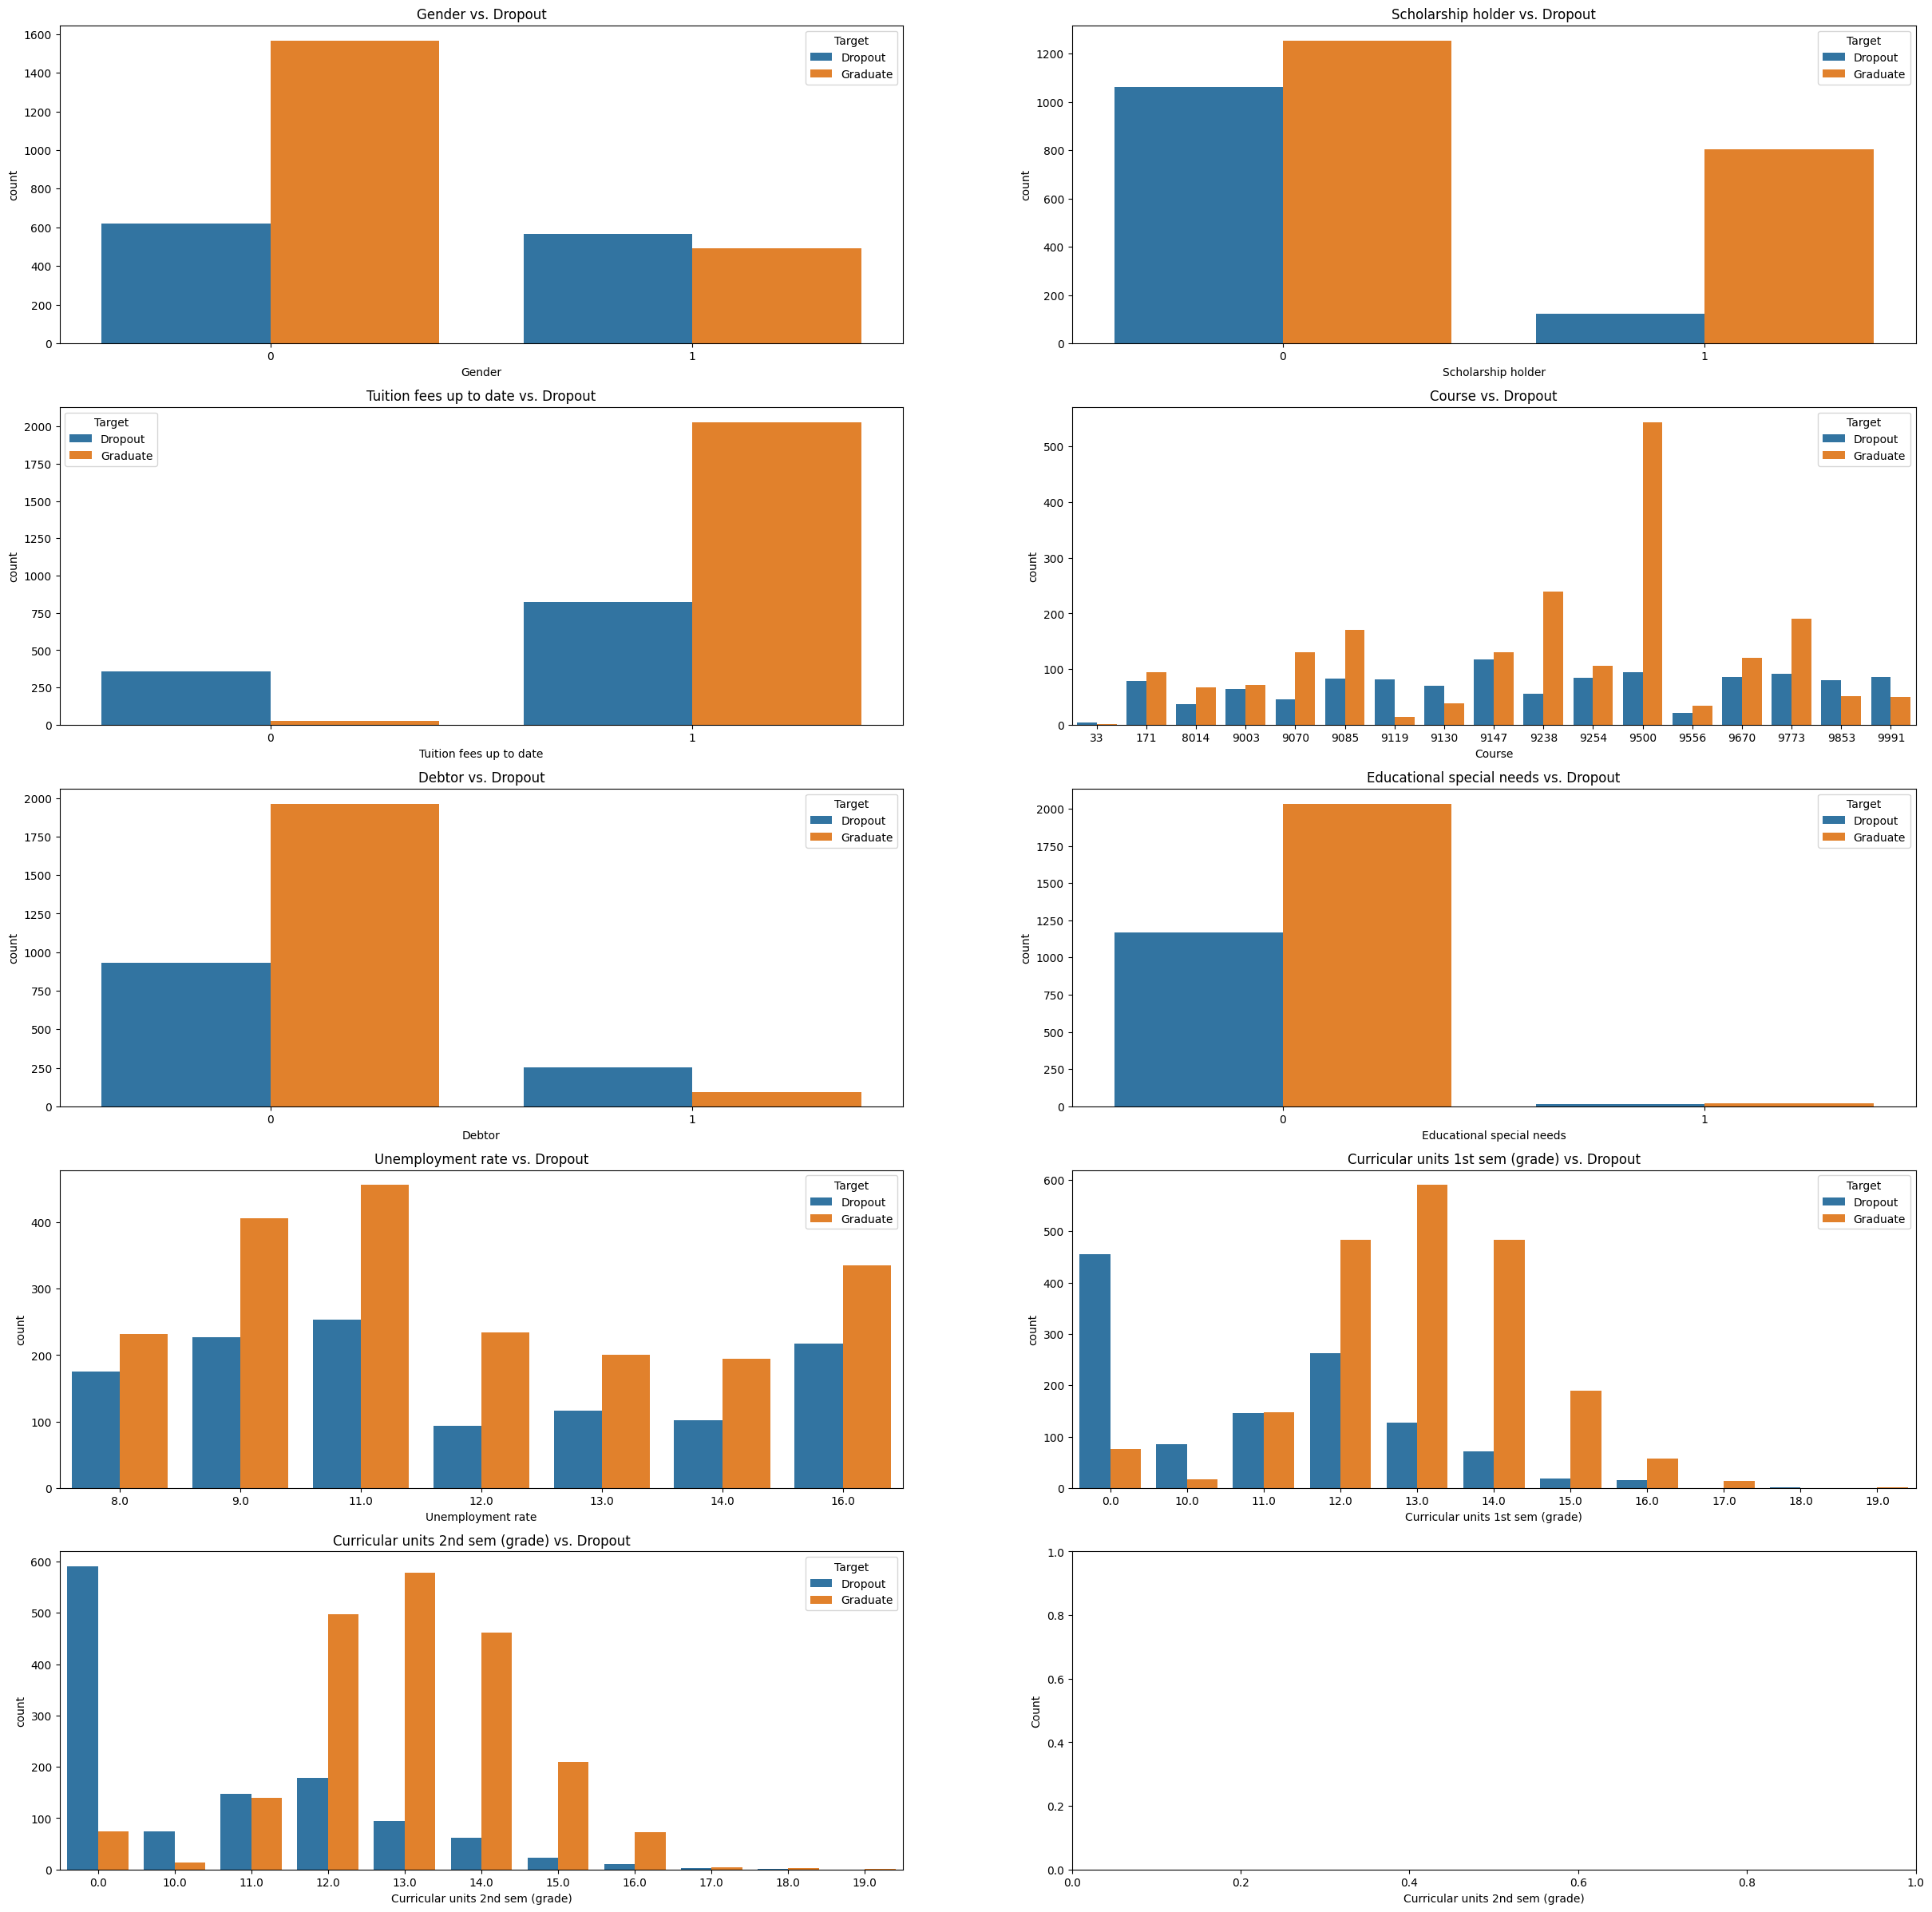

In [ ]:
# count plot
cols=['Gender','Scholarship holder','Tuition fees up to date','Course','Debtor','Educational special needs','Unemployment rate', 'Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)']
plt.figure(figsize=(8, 6))
fig, axes = plt.subplots(5, 2, figsize=(30, 30))
df_count=df
df_count['Target'].replace([0, 1],
                        ['Graduate','Dropout'], inplace=True)

k=0
for i in range(5):
  for j in range(2):
    if k==9 : break
    sns.countplot(x=cols[k], hue='Target', data=df_count,ax=axes[i,j]
)
    axes[i,j].set_title(cols[k]+" vs. Dropout")
    plt.xlabel(cols[k])
    plt.ylabel("Count")
    k=k+1

plt.show()

Scatter plot

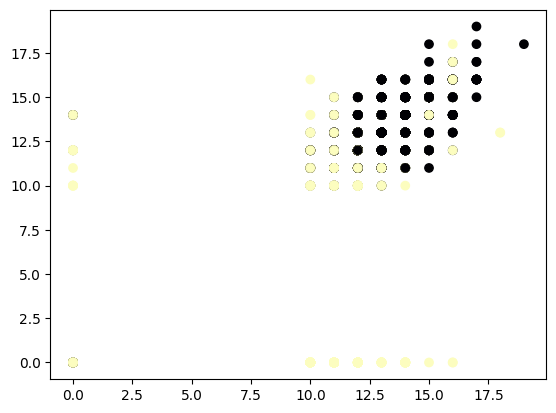

In [ ]:
plt.scatter(x =df['Curricular units 1st sem (grade)'],
             y = df['Curricular units 2nd sem (grade)'],
             c = df['Target'] , cmap = "magma"
            )
plt.show()

<Axes: xlabel='Age at enrollment', ylabel='Count'>

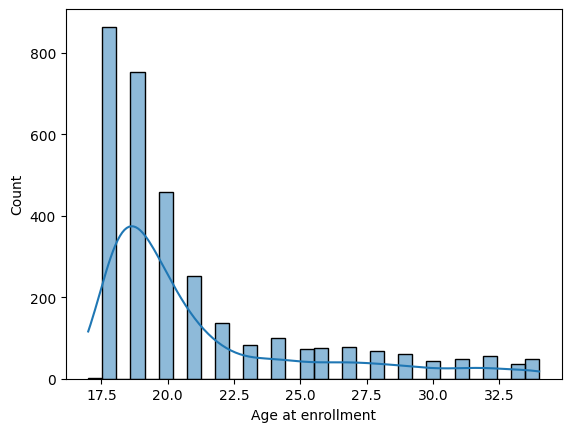

In [ ]:
sns.histplot(data=df['Age at enrollment'], kde=True)

In [ ]:
df.head(10)

,Marital status,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Mother's occupation,Father's occupation,Admission grade,Educational special needs,Debtor,...,Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Target
0,1,171,1,1,122.0,5,9,127.0,0,0,...,0.0,0,0,0,0,0,0.0,0,11.0,1
1,1,9254,1,1,160.0,3,3,142.0,0,0,...,14.0,0,0,6,6,6,14.0,0,14.0,0
2,1,9070,1,1,122.0,9,9,125.0,0,0,...,0.0,0,0,6,0,0,0.0,0,11.0,1
3,1,9773,1,1,122.0,5,3,120.0,0,0,...,13.0,0,0,6,10,5,12.0,0,9.0,0
6,1,9500,1,1,142.0,7,10,128.0,0,0,...,13.0,0,0,8,8,8,14.0,0,16.0,0
7,1,9254,1,1,119.0,9,9,113.0,0,0,...,0.0,0,0,5,5,0,0.0,0,16.0,1
8,1,9238,1,1,137.0,9,9,129.0,0,0,...,14.0,0,0,6,7,6,14.0,0,16.0,0
9,1,9238,1,1,138.0,4,7,123.0,0,1,...,11.0,0,0,6,14,2,14.0,0,9.0,1
10,1,9670,1,1,139.0,5,7,131.0,0,0,...,12.0,0,0,6,7,5,14.0,0,14.0,0
11,1,9500,1,1,136.0,9,9,119.0,0,0,...,13.0,0,0,8,8,7,13.0,0,13.0,0


In [ ]:
x = df.drop(columns='Target', axis=1)
y = df['Target']
x.head()

,Marital status,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Mother's occupation,Father's occupation,Admission grade,Educational special needs,Debtor,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate
0,1,171,1,1,122.0,5,9,127.0,0,0,...,0,0.0,0,0,0,0,0,0.0,0,11.0
1,1,9254,1,1,160.0,3,3,142.0,0,0,...,6,14.0,0,0,6,6,6,14.0,0,14.0
2,1,9070,1,1,122.0,9,9,125.0,0,0,...,0,0.0,0,0,6,0,0,0.0,0,11.0
3,1,9773,1,1,122.0,5,3,120.0,0,0,...,6,13.0,0,0,6,10,5,12.0,0,9.0
6,1,9500,1,1,142.0,7,10,128.0,0,0,...,7,13.0,0,0,8,8,8,14.0,0,16.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2592, 27), (649, 27), (2592,), (649,))

In [ ]:
def plot_confusion_matrix(y_test,y_pred,model):
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
  disp.plot()

  plt.show()

# Decision Tree

In [ ]:
modelDecisionTree = DecisionTreeClassifier()
modelDecisionTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
X_train_prediction_decision_tree = modelDecisionTree.predict(X_train)
trainingAccuracyDecisionTree = accuracy_score(y_train, X_train_prediction_decision_tree)
trainingAccuracyDecisionTree

1.0

In [ ]:
X_test_prediction_decision_tree = modelDecisionTree.predict(X_test)
testingAccuracyDecisionTree = accuracy_score(y_test, X_test_prediction_decision_tree)
testingAccuracyDecisionTree


0.8659476117103235

In [ ]:
scores_df=pd.DataFrame({'Model':[], 'F1_score':[], 'Accuracy':[]})

In [ ]:
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       408
           1       0.80      0.86      0.83       241

    accuracy                           0.87       649
   macro avg       0.86      0.87      0.86       649
weighted avg       0.87      0.87      0.87       649



In [ ]:
y_pred_train = dt.predict(X_train)

print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1649
           1       1.00      1.00      1.00       943

    accuracy                           1.00      2592
   macro avg       1.00      1.00      1.00      2592
weighted avg       1.00      1.00      1.00      2592



<Figure size 640x480 with 0 Axes>

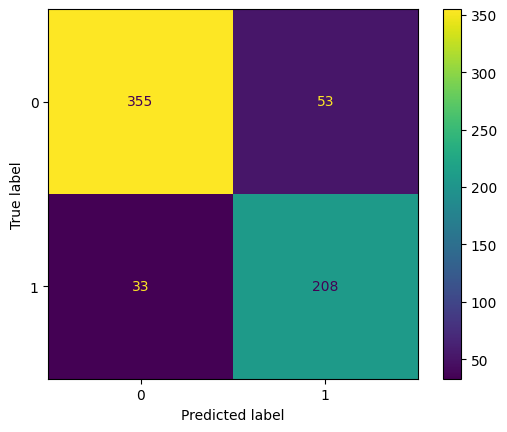

In [ ]:
plt.figure()
plot_confusion_matrix(y_test ,y_pred, dt)
plt.show()

cross validation on decision tree

In [ ]:
scores_train = cross_val_score(dt, X_train, y_train, cv=10)
scores_test= cross_val_score(dt, X_test, y_test, cv=10)
print(scores_train.mean(),scores_test.mean())

0.8576507276507277 0.8489182692307692


# Support Vector machine

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_model = SVC(kernel='linear', C=1.0, random_state=42)

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))


Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       408
           1       0.94      0.84      0.89       241

    accuracy                           0.92       649
   macro avg       0.93      0.91      0.91       649
weighted avg       0.92      0.92      0.92       649



In [ ]:
y_pred_train = svm_model.predict(X_train)

accuracy = accuracy_score(y_train, y_pred_train)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_train, y_pred_train))

Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1649
           1       0.95      0.80      0.87       943

    accuracy                           0.91      2592
   macro avg       0.92      0.89      0.90      2592
weighted avg       0.91      0.91      0.91      2592



<Figure size 640x480 with 0 Axes>

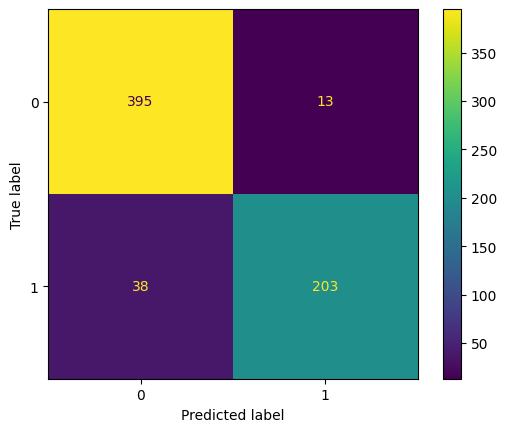

In [ ]:
plt.figure()
plot_confusion_matrix(y_test ,y_pred, svm_model)
plt.show()

cross validation on svm

In [ ]:
scores_train = cross_val_score(svm_model, X_train, y_train, cv=10)
scores_test= cross_val_score(svm_model, X_test, y_test, cv=10)
print(scores_train.mean(),scores_test.mean())

0.9066394416394417 0.9121875000000002


#Logistic Regression


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logistic_regression_model = LogisticRegression(C = 0.5)
logistic_regression_model = logistic_regression_model.fit(X_train,y_train)

y_pred = logistic_regression_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       408
           1       0.92      0.86      0.89       241

    accuracy                           0.92       649
   macro avg       0.92      0.91      0.91       649
weighted avg       0.92      0.92      0.92       649



In [ ]:
y_pred_train = logistic_regression_model.predict(X_train)

accuracy = accuracy_score(y_train, y_pred_train)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_train, y_pred_train))

Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1649
           1       0.94      0.82      0.88       943

    accuracy                           0.92      2592
   macro avg       0.92      0.90      0.91      2592
weighted avg       0.92      0.92      0.92      2592



<Figure size 640x480 with 0 Axes>

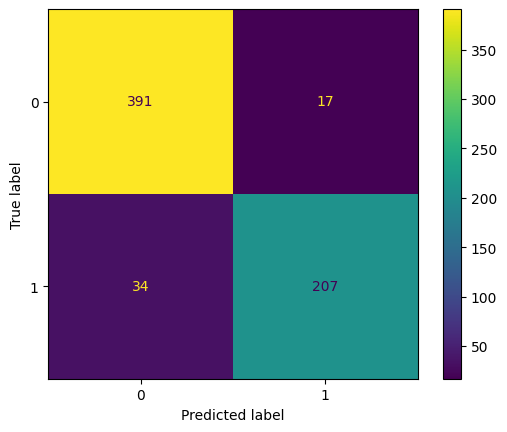

In [ ]:
plt.figure()
plot_confusion_matrix(y_test ,y_pred, logistic_regression_model)
plt.show()

cross validation on lr

In [ ]:
scores_train = cross_val_score(logistic_regression_model, X_train, y_train, cv=10)
scores_test= cross_val_score(logistic_regression_model, X_test, y_test, cv=10)
print(scores_train.mean(),scores_test.mean())

0.9132046332046333 0.9152403846153847


#k-Nearest Neighbors

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors = 3,algorithm='auto')
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       408
           1       0.85      0.78      0.82       241

    accuracy                           0.87       649
   macro avg       0.86      0.85      0.86       649
weighted avg       0.87      0.87      0.87       649



In [ ]:
y_pred_train = knn_model.predict(X_train)

accuracy = accuracy_score(y_train, y_pred_train)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_train, y_pred_train))

Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1649
           1       0.95      0.83      0.89       943

    accuracy                           0.92      2592
   macro avg       0.93      0.90      0.91      2592
weighted avg       0.92      0.92      0.92      2592



<Figure size 640x480 with 0 Axes>

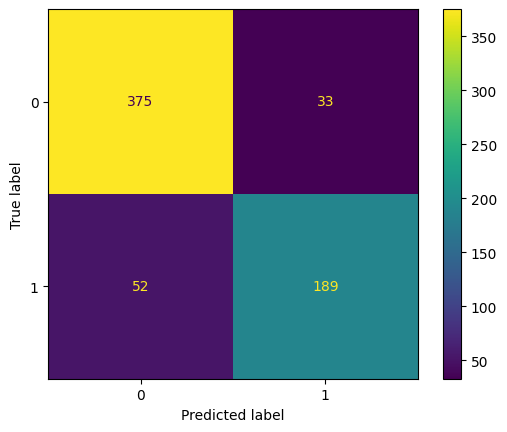

In [ ]:
plt.figure()
plot_confusion_matrix(y_test ,y_pred, knn_model)
plt.show()

cross validation on Knn

In [ ]:
scores_train = cross_val_score(knn_model, X_train, y_train, cv=10)
scores_test= cross_val_score(knn_model, X_test, y_test, cv=10)
print(scores_train.mean(),scores_test.mean())

0.869992574992575 0.8597596153846154


Naive Bayes


In [ ]:
standardizer = StandardScaler()
model = GaussianNB(var_smoothing = 1e-09)
model.fit(X_train,y_train)

GaussianNB()

AUC:0.88


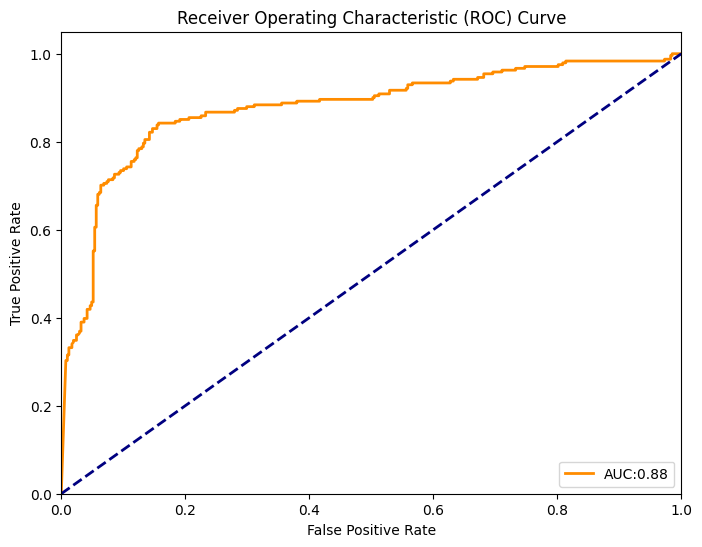

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_scores = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)
print(f'AUC:{roc_auc:.2f}')
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC:{roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
predictions = classifier.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       408
           1       0.83      0.73      0.77       241

    accuracy                           0.84       649
   macro avg       0.84      0.82      0.83       649
weighted avg       0.84      0.84      0.84       649



In [ ]:
y_pred_train = classifier.predict(X_train)

accuracy = accuracy_score(y_train, y_pred_train)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_train, y_pred_train))

Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1649
           1       0.82      0.73      0.77       943

    accuracy                           0.84      2592
   macro avg       0.84      0.82      0.83      2592
weighted avg       0.84      0.84      0.84      2592



<Figure size 640x480 with 0 Axes>

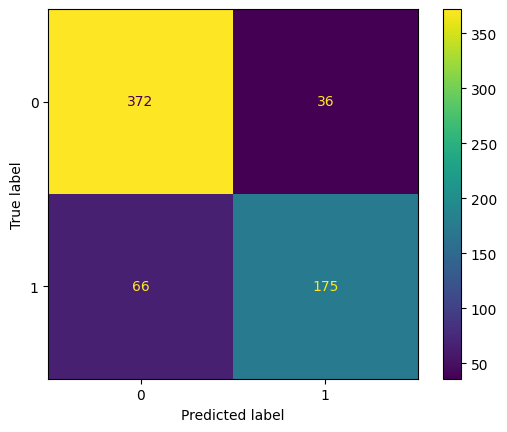

In [ ]:
plt.figure()
plot_confusion_matrix(y_test ,predictions, classifier)
plt.show()

cross validation on Naive bayes

In [ ]:
scores_train = cross_val_score(classifier, X_train, y_train, cv=10)
scores_test= cross_val_score(classifier, X_test, y_test, cv=10)
print(scores_train.mean(),scores_test.mean())

0.8418339768339769 0.8304326923076925
